<a href="https://colab.research.google.com/github/ad045/estimating_grid_alignments/blob/main/LTC_grid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The basics of Neural Circuit Policies on the LTC model

![wirings.png](https://raw.githubusercontent.com/mlech26l/keras-ncp/master/misc/wirings.png)

Included:
- Training and testing sets
- MSE and R2 error for comparison
- Time series plot for each option

# Getting data and imports



In [ ]:
# Install dependencies if they are not installed yet
!pip install seaborn ncps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.2 MB/s eta 0:00:00


In [ ]:

import numpy as np
import pandas as pd
import os
from tensorflow import keras
from ncps import wirings
from ncps.tf import LTC
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import minmax_scale # function
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
num_voxels = 23
voxel_list = ['voxel_' + str(i) for i in range(1, num_voxels+1)]
print(voxel_list)

['voxel_1', 'voxel_2', 'voxel_3', 'voxel_4', 'voxel_5', 'voxel_6', 'voxel_7', 'voxel_8', 'voxel_9', 'voxel_10', 'voxel_11', 'voxel_12', 'voxel_13', 'voxel_14', 'voxel_15', 'voxel_16', 'voxel_17', 'voxel_18', 'voxel_19', 'voxel_20', 'voxel_21', 'voxel_22', 'voxel_23']


In [ ]:
df = pd.read_csv("/content/time_series_run012_ROI.csv", header = None, names = voxel_list )

In [ ]:
# Normalize the column
for voxel in voxel_list:
  df[voxel] = minmax_scale(df[voxel])

# Plot the normalized dataframe
# plt.plot(df)

In [ ]:
column_arrays = []

df['vox_mean'] = np.mean(df, axis=1)
df['shifted_mean'] = df['vox_mean'].shift(periods=-1)
df = df.drop(df.index[-1]) #important! Otherwise the code does not work ("NaN" in array trips up mse...)


# Iterate over the voxel columns and append their values to the list
for voxel in voxel_list:
    column_array = df[voxel].values
    column_arrays.append(column_array)

# column_arrays.append(df['vox_mean'].values)
# column_arrays.append(df['shifted_mean'].values)

# Combine the arrays into a single array with the desired shape
data_x = np.column_stack(column_arrays)

In [ ]:
N = len(data_x[0])
N

23

In [ ]:
len(data_x)

165

In [ ]:
data_y = df['shifted_mean'].values.reshape([165, 1, 1]).astype(np.float32)

In [ ]:
data_x = np.reshape(data_x, (165, 1, 23))

In [ ]:
train_size = int(len(data_x) * 0.70)
test_size = len(data_x) - train_size
train_size

115

In [ ]:
test_size

50

In [ ]:
data_x

array([[[0.63768116, 0.77142857, 0.77192982, ..., 1.        ,
         1.        , 1.        ]],

       [[0.56521739, 0.37142857, 0.71929825, ..., 0.8125    ,
         0.85365854, 0.83116883]],

       [[0.82608696, 0.55714286, 1.        , ..., 0.725     ,
         0.57317073, 0.66233766]],

       ...,

       [[0.42028986, 0.52857143, 0.33333333, ..., 0.7125    ,
         0.75609756, 0.64935065]],

       [[0.46376812, 0.58571429, 0.43859649, ..., 0.125     ,
         0.35365854, 0.23376623]],

       [[0.33333333, 0.44285714, 0.29824561, ..., 0.15      ,
         0.3902439 , 0.25974026]]])

In [ ]:
train_X, test_X = data_x[0:train_size,:,:], data_x[train_size:,:,:]
train_y, test_y = data_y[0:train_size,:,:], data_y[train_size:,:,:]

In [ ]:
test_X

array([[[0.44927536, 0.47142857, 0.43859649, ..., 0.5       ,
         0.42682927, 0.45454545]],

       [[0.24637681, 0.5       , 0.21052632, ..., 0.8       ,
         0.64634146, 0.64935065]],

       [[0.37681159, 0.51428571, 0.36842105, ..., 0.3375    ,
         0.51219512, 0.46753247]],

       ...,

       [[0.42028986, 0.52857143, 0.33333333, ..., 0.7125    ,
         0.75609756, 0.64935065]],

       [[0.46376812, 0.58571429, 0.43859649, ..., 0.125     ,
         0.35365854, 0.23376623]],

       [[0.33333333, 0.44285714, 0.29824561, ..., 0.15      ,
         0.3902439 , 0.25974026]]])

In [ ]:
train_X

array([[[0.63768116, 0.77142857, 0.77192982, ..., 1.        ,
         1.        , 1.        ]],

       [[0.56521739, 0.37142857, 0.71929825, ..., 0.8125    ,
         0.85365854, 0.83116883]],

       [[0.82608696, 0.55714286, 1.        , ..., 0.725     ,
         0.57317073, 0.66233766]],

       ...,

       [[0.23188406, 0.17142857, 0.26315789, ..., 0.375     ,
         0.70731707, 0.57142857]],

       [[0.26086957, 0.22857143, 0.29824561, ..., 0.3375    ,
         0.63414634, 0.5974026 ]],

       [[0.65217391, 0.47142857, 0.71929825, ..., 0.425     ,
         0.47560976, 0.49350649]]])

In [ ]:
data_y.shape

(165, 1, 1)

data_x.shape:  (165, 1, 23)
data_y.shape:  (165, 1, 1)


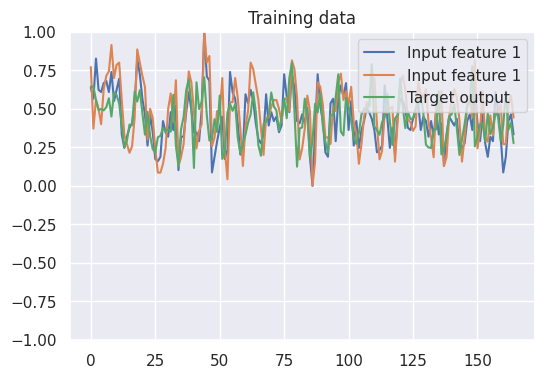

In [ ]:
# N = 48 # Length of the time-series
# # Input feature is a sine and a cosine wave
# data_x = np.stack(
#     [np.sin(np.linspace(0, 3 * np.pi, N)), np.cos(np.linspace(0, 3 * np.pi, N))], axis=1
# )
# data_x = np.expand_dims(data_x, axis=0).astype(np.float32)  # Add batch dimension
# # Target output is a sine with double the frequency of the input signal
# data_y = np.sin(np.linspace(0, 6 * np.pi, N)).reshape([1, N, 1]).astype(np.float32)
print("data_x.shape: ", str(data_x.shape))
print("data_y.shape: ", str(data_y.shape))

# Let's visualize the training data
sns.set()
plt.figure(figsize=(6, 4))
plt.plot(data_x[:, 0, 0], label="Input feature 1")
plt.plot(data_x[:, 0, 1], label="Input feature 1") #examplarily...
plt.plot(data_y.reshape(-1), label="Target output")
plt.ylim((-1, 1))
plt.title("Training data")
plt.legend(loc="upper right")
plt.show()

# LCT model, fully-connected wiring, 23 voxels


## The LTC model

The ```ncps``` package is composed of two main parts:

- The LTC model as a ```tf.keras.layers.Layer``` RNN
- An wiring architecture for the LTC cell above

The wiring could be fully-connected (all-to-all) or sparsely designed using the NCP principles introduced in the paper.

Note that as the LTC model is expressed in the form of a system of [ordinary differential equations in time](https://arxiv.org/abs/2006.04439), any instance of it is inherently a recurrent neural network (RNN).
That's why this simple example considers a sinusoidal time-series.



In [ ]:
fc_wiring = wirings.FullyConnected(8, 1)  # 8 units, 1 of which is a motor neuron

model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, 23)),
        LTC(fc_wiring, return_sequences=True),
    ]
)
model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ltc (LTC)                   (None, None, 1)           1064      
                                                                 
Total params: 1,064
Trainable params: 1,064
Non-trainable params: 0
_________________________________________________________________


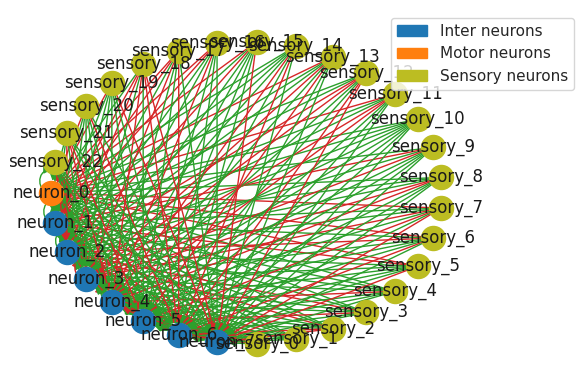

In [ ]:
sns.set_style("white")
plt.figure(figsize=(6, 4))
legend_handles = fc_wiring.draw_graph(draw_labels=True)
plt.legend(handles=legend_handles, loc="upper center", bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Visualizing the prediction of the network before training

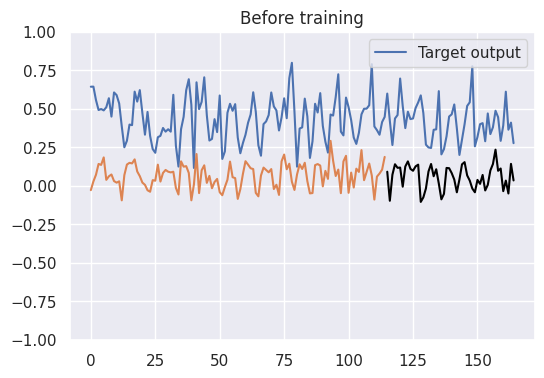

In [ ]:
# Let's visualize how LTC initialy performs before the training
sns.set()
prediction_train = model(train_X).numpy()
prediction_test = model(test_X).numpy()
prediction = np.concatenate((prediction_train, prediction_test))
plt.figure(figsize=(6, 4))
plt.plot(data_y.reshape(-1), label="Target output")
# plt.plot(prediction.reshape(-1), label="LTC output")

# pred_train_vox
c = np.empty_like(data_y.reshape(-1)) #[train_vox_y, test_vox_y])
c[:] = np.nan
c[:train_size] = prediction_train.reshape(-1) # pred_train_vox.reshape(len(pred_train_vox),1)
# c[look_back:train_size+look_back] = final_predictions_train.reshape(-1) # pred_train_vox.reshape(len(pred_train_vox),1)
plt.plot(c)

# pred_test_vox
d = np.empty_like(data_y.reshape(-1)) #[train_vox_y, test_vox_y])
d[:] = np.nan
d[train_size:] = prediction_test.reshape(-1) # pred_test_vox_1.reshape(len(pred_test_vox),1)
plt.plot(d, 'black')

plt.ylim((-1, 1))
plt.title("Before training")
plt.legend(loc="upper right")
plt.show()

### Training the model

In [ ]:
# Train the model for 400 epochs (= training steps)
hist = model.fit(x=train_X, y=train_y, batch_size=1, epochs=400,verbose=1)

### Plotting the training loss

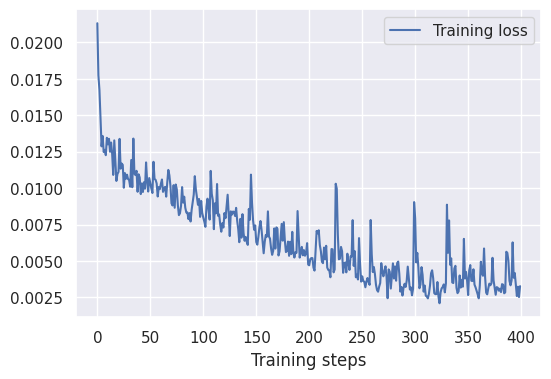

In [ ]:
# Let's visualize the training loss
sns.set()
plt.figure(figsize=(6, 4))
plt.plot(hist.history["loss"], label="Training loss")
plt.legend(loc="upper right")
plt.xlabel("Training steps")
plt.show()

### Plotting the prediction of the trained model


---



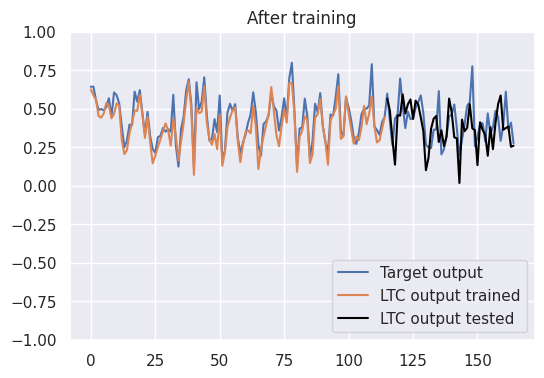

In [ ]:
# Let's visualize how LTC initialy performs after the training
sns.set()
prediction_train = model(train_X).numpy()
prediction_test = model(test_X).numpy()
prediction = np.concatenate((prediction_train, prediction_test))
plt.figure(figsize=(6, 4))
plt.plot(data_y.reshape(-1), label="Target output")
# plt.plot(prediction.reshape(-1), label="LTC output")

# plot predicted training
c = np.empty_like(data_y.reshape(-1)) #[train_vox_y, test_vox_y])
c[:] = np.nan
c[:train_size] = prediction_train.reshape(-1) # pred_train_vox.reshape(len(pred_train_vox),1)
# c[look_back:train_size+look_back] = final_predictions_train.reshape(-1) # pred_train_vox.reshape(len(pred_train_vox),1)
plt.plot(c, label="LTC output trained")

# plot predicted testing
d = np.empty_like(data_y.reshape(-1)) #[train_vox_y, test_vox_y])
d[:] = np.nan
d[train_size:] = prediction_test.reshape(-1) # pred_test_vox_1.reshape(len(pred_test_vox),1)
plt.plot(d, color = 'black', label="LTC output tested")


plt.ylim((-1, 1))
plt.title("After training")
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_y.reshape(-1)

array([0.59876555, 0.42171547, 0.26484212, 0.437084  , 0.45951054,
       0.6965666 , 0.51824623, 0.37470216, 0.4811203 , 0.43323967,
       0.4372041 , 0.50541806, 0.5416724 , 0.58720034, 0.47216988,
       0.26728398, 0.24917832, 0.24556589, 0.36371425, 0.3666036 ,
       0.61469597, 0.20402838, 0.23816903, 0.3214685 , 0.44990298,
       0.46416444, 0.52837163, 0.3730839 , 0.20047598, 0.29860902,
       0.40036786, 0.5184734 , 0.5422533 , 0.77627957, 0.25647473,
       0.3174534 , 0.4000176 , 0.40702796, 0.28932533, 0.4698293 ,
       0.3357964 , 0.38035637, 0.48741296, 0.4459351 , 0.29193977,
       0.391771  , 0.6111989 , 0.36431932, 0.41037464, 0.27688545],
      dtype=float32)

In [ ]:
mse = mean_squared_error(test_y.reshape(-1), prediction_test.reshape(-1))
r2 = r2_score(test_y.reshape(-1), prediction_test.reshape(-1))

In [ ]:
mse

0.020931054

In [ ]:
r2

-0.31014192779682026

# Random network with 75% sparsity


Removal of 75% of all synapses


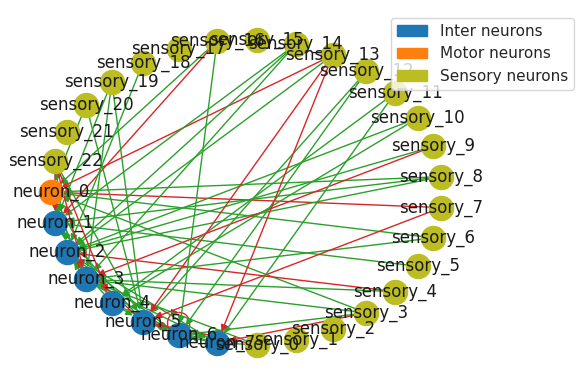

In [ ]:
# Define LTC cell and wiring architecture
rnd_wiring = wirings.Random(8, 1,sparsity_level=0.75)  # 8 units, 1 motor neuron

# Define Keras model
sparse_model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, 23)),
        LTC(rnd_wiring, return_sequences=True),
    ]
)
sparse_model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)

# Plot the wiring
sns.set_style("white")
plt.figure(figsize=(6, 4))
legend_handles = rnd_wiring.draw_graph(draw_labels=True)
plt.legend(handles=legend_handles, loc="upper center", bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Comparing random sparse vs fully-connected networks

In [ ]:
hist_rand = sparse_model.fit(x=train_X, y=train_y, batch_size=1, epochs=400,verbose=0)

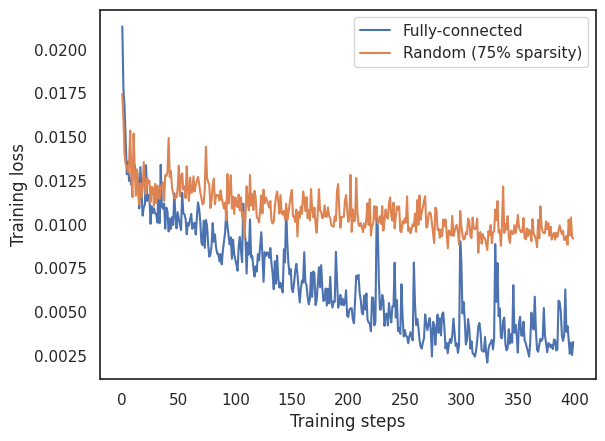

In [ ]:
plt.plot(hist.history["loss"], label="Fully-connected")
plt.plot(hist_rand.history["loss"], label="Random (75% sparsity)")
plt.legend(loc="upper right")
plt.xlabel("Training steps")
plt.ylabel("Training loss")
plt.show()

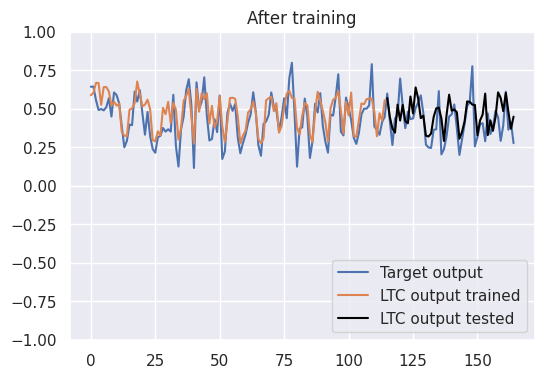

In [ ]:
# Let's visualize how LTC initialy performs after the training
sns.set()
prediction_train = sparse_model(train_X).numpy() # ist eig das random model!
prediction_test= sparse_model(test_X).numpy()
prediction = np.concatenate((prediction_train, prediction_test))
plt.figure(figsize=(6, 4))
plt.plot(data_y.reshape(-1), label="Target output")
# plt.plot(prediction.reshape(-1), label="LTC output")

# plot predicted training
c = np.empty_like(data_y.reshape(-1)) #[train_vox_y, test_vox_y])
c[:] = np.nan
c[:train_size] = prediction_train.reshape(-1) # pred_train_vox.reshape(len(pred_train_vox),1)
plt.plot(c, label="LTC output trained")

# plot predicted testing
d = np.empty_like(data_y.reshape(-1)) #[train_vox_y, test_vox_y])
d[:] = np.nan
d[train_size:] = prediction_test.reshape(-1) # pred_test_vox_1.reshape(len(pred_test_vox),1)
plt.plot(d, color = 'black', label="LTC output tested")


plt.ylim((-1, 1))
plt.title("After training")
plt.legend(loc="lower right")
plt.show()

In [ ]:
mse = mean_squared_error(test_y.reshape(-1), prediction_test.reshape(-1))
r2 = r2_score(test_y.reshape(-1), prediction_test.reshape(-1))

In [ ]:
mse

0.015396134

In [ ]:
r2

0.03630650543149361

We see that the sparse model is not able to fit the sinusoidal signal as perfectly as the fully-connected architecture.

### Neural Circuit Policy wiring architecture

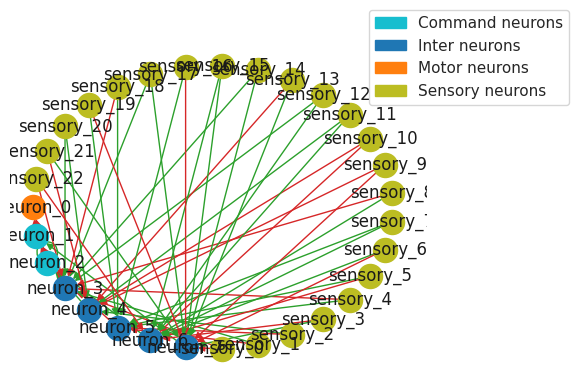

In [ ]:
ncp_arch = wirings.AutoNCP(8,1)

ncp_model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, 23)),
        LTC(ncp_arch, return_sequences=True),
    ]
)
ncp_model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)
sns.set_style("white")
plt.figure(figsize=(6, 4))
legend_handles = ncp_arch.draw_graph(draw_labels=True, neuron_colors={"command": "tab:cyan"})
plt.legend(handles=legend_handles, loc="upper center", bbox_to_anchor=(1.1, 1.1))
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [ ]:
# Train the model for 400 epochs (= training steps)
hist_ncp = ncp_model.fit(x=train_X, y=train_y, batch_size=1, epochs=400,verbose=1)

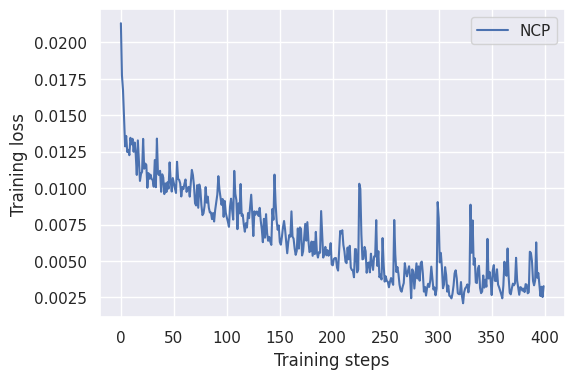

In [ ]:
sns.set()
plt.figure(figsize=(6, 4))
# plt.plot(hist.history["loss"], label="Fully-connected")
# plt.plot(hist_rand.history["loss"], label="Random (75% sparsity)")
plt.plot(hist.history["loss"], label="NCP")
plt.legend(loc="upper right")
plt.xlabel("Training steps")
plt.ylabel("Training loss")
plt.show()

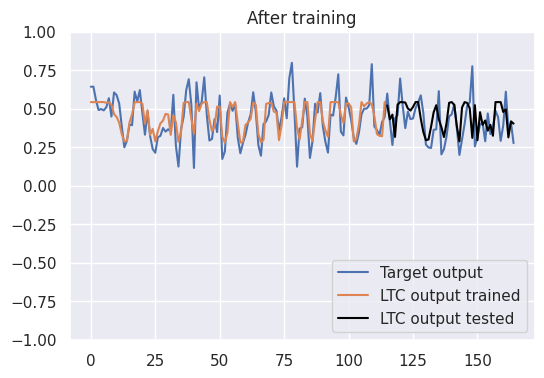

In [ ]:
# Let's visualize how LTC initialy performs after the training
sns.set()
prediction_train = ncp_model(train_X).numpy() # ist eig das random model!
prediction_test= ncp_model(test_X).numpy()
prediction = np.concatenate((prediction_train, prediction_test))
plt.figure(figsize=(6, 4))
plt.plot(data_y.reshape(-1), label="Target output")
# plt.plot(prediction.reshape(-1), label="LTC output")

# plot predicted training
c = np.empty_like(data_y.reshape(-1)) #[train_vox_y, test_vox_y])
c[:] = np.nan
c[:train_size] = prediction_train.reshape(-1) # pred_train_vox.reshape(len(pred_train_vox),1)
plt.plot(c, label="LTC output trained")

# plot predicted testing
d = np.empty_like(data_y.reshape(-1)) #[train_vox_y, test_vox_y])
d[:] = np.nan
d[train_size:] = prediction_test.reshape(-1) # pred_test_vox_1.reshape(len(pred_test_vox),1)
plt.plot(d, color = 'black', label="LTC output tested")


plt.ylim((-1, 1))
plt.title("After training")
plt.legend(loc="lower right")
plt.show()

In [ ]:
mse = mean_squared_error(test_y.reshape(-1), prediction_test.reshape(-1))
r2 = r2_score(test_y.reshape(-1), prediction_test.reshape(-1))

In [ ]:
mse

0.016749386

In [ ]:
r2

-0.04839778516689375

We see that the network with the NCP wiring architecture could fit the data as close as the fully-connected model.

### Computing the sparsity of a NCP network




In [ ]:
# Let's compare how many synapses the NCP network has compared to the fully-connected one
sparsity = 1 - ncp_arch.synapse_count /fc_wiring.synapse_count
print("Sparsity level is {:0.2f}%".format(100*sparsity))

Sparsity level is 85.94%


The network with the NCP wiring performs as good as the fully-connected network but is even sparser than our random network tested above.